# Домашнее задание "Центральная предельная теорема своими руками"

Для начала - загрузим необходимые библиотеки и переключимся на режим отрисовки графиков inline и установим подходящие размеры графика.

In [105]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
import numpy as np
import pandas as pd
import sys

%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 10

## Часть 1. Выбор распределения, генерация выборки, рисование гистограммы и графика функции плотности

Выбранное расрпределение - бета распределение с параметрами $\alpha = 6, \beta = 3$.  
В данном блоке:
1. Рассчитаны среднее и дисперсия распределения
2. Взяты 100 точек графика плотности распределения
3. Сгенерирована выборка на 1000 элементов из выбранного распределения
4. Нарисована гистограмма выборки и график теоретической функции плотности выбранного распределения

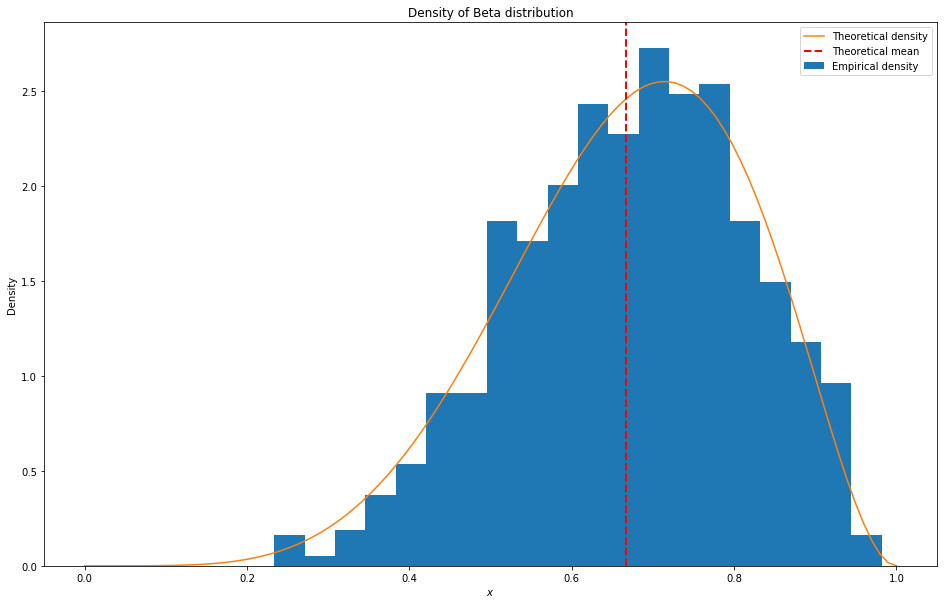

In [85]:
a, b = 6.0, 3.0
betaMean = a/(a+b)
betaVar = a*b/((a+b)**2*(a+b+1))
x = np.linspace(0,1,100)
betaDistr = sts.beta(a, b )
betaPDF = betaDistr.pdf(x)
betaSample1 = betaDistr.rvs(size=1000)
plt.hist(betaSample1, bins=20, normed=True, label = 'Empirical density')
plt.plot(x, betaPDF, label = 'Theoretical density')
plt.axvline(betaMean, color='r', linestyle='dashed', linewidth=2, label = 'Theoretical mean')
plt.title('Density of Beta distribution')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.legend()

Теоретическое среднее такого распределения: $\mu = \frac{\alpha}{\alpha + \beta} = $ 0,66...  
Теоретическая дисперсия: $\sigma^2 = \frac{\alpha*\beta}{(\alpha + \beta)^2*(\alpha+\beta+1)} = $ 0,022...  
Мы видим, что распределение ряда скошено налево. 

# Часть 2. Рисование гистограммы и графика функции плотности распределения средних

В данном блоке для каждого размера выборки k (где k = 5, 15, 50):
1. Сгенерировано 1000 выборок размера k, и получен вектор средних значений
2. Рассчитано стандартное отклонение расдределения средних для выборки размера k
3. Построены гистограмма и график функции плотности распределения средних для выборки размера k

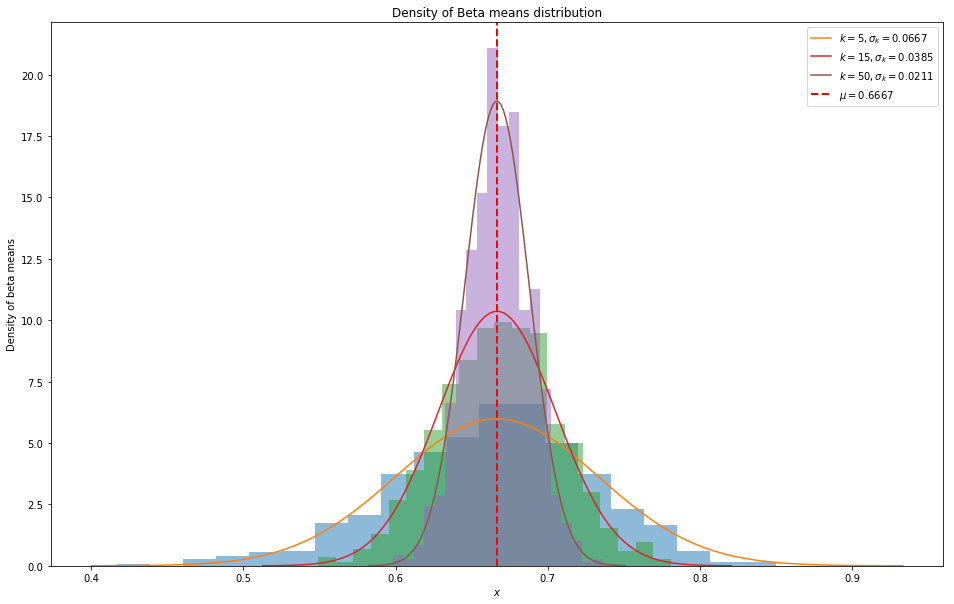

In [115]:
normEParams = list()
for k in [5, 15, 50]:
    meansSample = np.mean(betaDistr.rvs(size=k*1000).reshape(1000,k),1)
    betaMeanSd = np.sqrt(betaVar/k)
    normEParams.append([betaMean, betaMeanSd, meansSample.mean(), np.std(meansSample)])
    norm_rv = sts.norm(loc=betaMean, scale=betaMeanSd)
    x = np.linspace(betaMean - 4 * betaMeanSd,betaMean + 4 * betaMeanSd,100)
    normPDF = norm_rv.pdf(x)
    plt.hist(meansSample, bins=20, normed=True, alpha = 0.5)
    plt.plot(x, normPDF, label = '$k=%s, \sigma_k = %s$' %(k,np.round(betaMeanSd,4)))
normEParams = pd.DataFrame(normEParams, ('k = 5', 'k = 15', 'k = 50'), ('$\mu$', '$\sigma$','$\hat{\mu}$', '$\hat{\sigma}$'))
plt.axvline(betaMean, color='r', linestyle='dashed', linewidth=2, label = '$\mu = %s$' %np.round(betaMean,4))
plt.title('Density of Beta means distribution')
plt.xlabel('$x$')
plt.ylabel('Density of beta means')
plt.legend()

In [117]:
normEParams #Теоретические и оцененные параметры нормального распредления средних для разных размеров выборок

,$\mu$,$\sigma$,$\hat{\mu}$,$\hat{\sigma}$
k = 5,0.666667,0.066667,0.662880,0.065087
k = 15,0.666667,0.038490,0.667809,0.038620
k = 50,0.666667,0.021082,0.667106,0.021031


На графиках мы видим, что гистограммы и график плотности функции сужаются вокруг теоретического среднего с ростом размера выборки.  
Кроме того в таблице выше видно, что эмпирическое среднее приближается к теоретическому среднему, а эмпирическое стандартное отклонение убывает, как  и предсказывает теория, при увеличении размера выборки. 

# Выводы
ЦПТ утверждает (говоря не строго), что при росте размера выборки, распределение среднего этой выборки будет приближаться к нормальному распределению с параметрами $\mu, \frac {\sigma}{\sqrt{k}}$, где $\mu$ - среднее выборки, $\sigma$ - стандартное отклонение значений выборки, k - размер выборки.  
Эмпирические наблюдения, проделанные и проанализированные в данной работе подтверждают этот утверждение.